In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.constants import g,pi #cte gravedad
import pandas as pd

# Primera Parte
## Cte elástica del resorte
Para hallar ese valor se tomo la ecuación mg = kx, donde x es la deformación producida por la masa al sujetarla al resorte en equilibrio, además se toma como punto 0 donde se encuentra el resorte sin ninguna masa.

In [2]:
#Valor de la gravedad estándar utilizada
g

9.80665

In [3]:
datos = pd.read_csv('DatosLab.csv',sep=';')
datos

,Masa (g),Elongación (m)
0,5.165,0.017
1,9.872,0.032
2,15.037,0.049
3,20.031,0.065
4,25.196,0.083
5,29.903,0.099
6,35.068,0.115


In [4]:
m = datos['Masa (g)']
x = datos['Elongación (m)']

In [5]:
def func(x, a, b):
    return a*x+b

param, cov = curve_fit(func, x, (m/1000)*g)    #La mejor opción de uso por estética
param2, cov2 = curve_fit(func, x/9.81, m/1000)

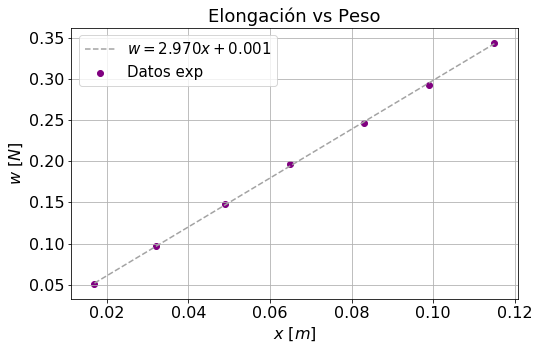

In [6]:
#Creamos una figura de tamaño 8x5
plt.figure(figsize=(8, 5)) 

#Graficamos la función de ajustr
plt.plot(x, func(x, *param), color ='#a3a3a3', linestyle='--', label='$w = %.3fx+%.3f$'%(param[0],param[1]))
plt.scatter(x, (m/1000)*g, color='#800080', label='Datos exp')
plt.legend() #mostrar leyendes de los datos y ajuste
#Al multiplicar la masa por  9.81 nos da como resultadoel peso en Newtons

#---------------------------------------------------
##Definimos titulos, tamaño de fuente y de etiquetas
#---------------------------------------------------

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Elongación vs Peso', fontsize = 18)
plt.legend(fontsize = 15, loc='upper left')

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$w$ [$N$]', fontsize = 16)
plt.xlabel('$x$ [$m$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 16)
plt.yticks(size = 16)

plt.grid(True) #mostramos la rejilla de fondo
plt.show() #mostramos todo lo que graficamos

In [7]:
# Cte elástica del resorte

k = param[0]
k

2.9696696188074467

In [8]:
# Valor de la fuerza de amortiguamiento

b = param[1]
b

0.0013643403216552345

# Segunda Parte
## Análisis datos por cada caso

Para comenzar a realizar el análisis se debe partir de graficar (t vs x) (t vs v) (t vs a) (v vs x) para conocer caracteristeicas como el tipo de movimiento. Luego de eso se realiza una aproximación de las funciones dadas por la teoría en recorrido y velocidad, en consecuencia de estas se obtienen los parámetros de amplitud, cte amortiguamiento y fase. Además luego se halla el periodo el cual depende de la frecuencia fundamental

In [9]:
# 1. Leer cada archivo primero se debe cambiar las comas por puntos

dat25 = pd.read_csv('datos laboratorio/8 cm 5 g.txt', skiprows=4, sep='\t')
dat25 = dat25.dropna()
dat25

,Tiempo t / s,Recorrido s_A1 / m,Fuente S_1,Velocidad v / m/s,Aceleración a / m/s^2
2,99.995,0.051,0,0.402902,-2.299975
3,148.982,0.068,0,0.263478,-3.152167
4,199.970,0.077,0,0.086514,-3.501156
5,248.984,0.077,0,-0.086527,-3.556154
6,299.967,0.068,0,-0.269194,-3.145630
...,...,...,...,...,...
693,34645.182,0.003,0,0.030431,-0.200970
694,34696.176,0.004,0,0.009611,-0.300084
695,34745.186,0.004,0,0.000000,-0.099017
696,34795.176,0.004,0,0.000000,-0.101071


In [10]:
# 2. Separar cada columna para mejor manejo

t = dat25['Tiempo t / s']
r = dat25['Recorrido s_A1 / m']
f = dat25['Fuente S_1']
v = dat25['Velocidad v / m/s']
a = dat25['Aceleración a / m/s^2']


In [11]:
# 3. Se crean las funciones para hallar valores como amplitud, cte amortiguamiento y fase, además de comparar esos valores
#    entre el recorrido y la velocidad (psdt: no pude con aceleración ya que no encontré la fórmula)

def func1(x, a, b, w, c):
    return a*np.exp(-b*x)*np.sin((w*x)+c)

def func2(x, a, b, w, c):
    return -b*a*np.exp(-b*x)*np.sin((w*x)+c) + a*np.exp(-b*x)*w*np.cos((w*x)+c)

param3, cov = curve_fit(func1, t, r)  
param4, cov = curve_fit(func2, t, v)  

C:\Users\USUARIO\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Text(0.5, 1.0, 'Tiempo vs Aceleración')

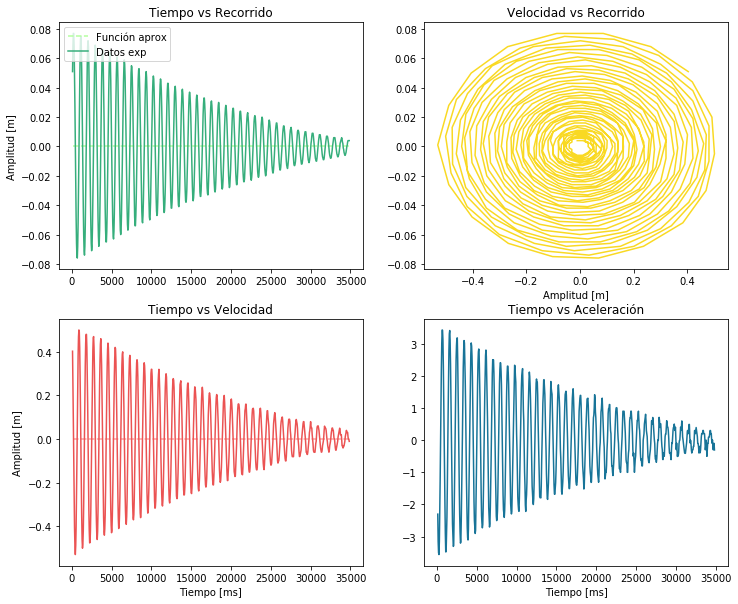

In [12]:
# 4. Se crean las gráficas de los casos

fig, axs = plt.subplots(2, 2,figsize=(12,10))
axs[0, 0].plot(t, func1(t,*param3),color='#B4FF9F',linestyle='--', label='Función aprox')
axs[0, 0].plot(t, r, color='#36AE7C', label='Datos exp')
axs[0, 0].set(ylabel='Amplitud [m]')
axs[0, 0].set_title('Tiempo vs Recorrido')
axs[0, 0].legend(loc='upper left')
axs[0, 1].plot(v, r, color='#F9D923')
axs[0, 1].set(xlabel='Amplitud [m]')
axs[0, 1].set_title('Velocidad vs Recorrido')
axs[1, 0].plot(t, func2(t,*param4),color='#FFA1A1',linestyle='--', label='Función aprox')
axs[1, 0].plot(t, v, color='#EB5353')
axs[1, 0].set(xlabel='Tiempo [ms]', ylabel='Amplitud [m]')
axs[1, 0].set_title('Tiempo vs Velocidad')
axs[1, 1].plot(t, a, color='#187498')
axs[1, 1].set(xlabel='Tiempo [ms]')
axs[1, 1].set_title('Tiempo vs Aceleración')


In [13]:
# 5. Se hallan los valores de amplitud, cte amortiguamiento y fase

Amplitud = param3[0]
cteb = param3[1]
fase = param3[3]
Amplitudv = param4[0]
ctebv = param4[1]
fasev = param4[3]
Amplitud, cteb, fase, Amplitudv, ctebv, fasev

(1.0, 1.0, 1.0, 1.0, 1.0, 1.0)

In [14]:
# 6. Se necesita hallar el periodo T para cada masa, este período se realiza con la frecuencia fundamental

Tx = 2*pi*(np.sqrt(5/k))
Tx

8.152875352683054

## AUTOMATIZANDO LO ANTERIOR

In [15]:
def auto(n,m,g):
    
    # 1. Leer cada archivo primero se debe cambiar las comas por puntos
    dat25 = pd.read_csv(n, skiprows=4, sep='\t')
    dat25 = dat25.dropna()
    
    # 2. Separar cada columna para mejor manejo
    t = dat25['Tiempo t / s']
    r = dat25['Recorrido s_A1 / m']
    f = dat25['Fuente S_1']
    v = dat25['Velocidad v / m/s']
    a = dat25['Aceleración a / m/s^2']
    
    # 3. Se crean las funciones para hallar valores como amplitud, cte amortiguamiento y fase, además de comparar esos valores
    #entre el recorrido y la velocidad (psdt: no pude con aceleración ya que no encontré la fórmula)
    def func1(x, a, b, w, c):
        return a*np.exp(-b*x)*np.sin((w*x)+c)
    def func2(x, a, b, w, c):
        return -b*a*np.exp(-b*x)*np.sin((w*x)+c) + a*np.exp(-b*x)*w*np.cos((w*x)+c)
    param3, cov = curve_fit(func1, t, r)  
    param4, cov = curve_fit(func2, t, v)  
    
    # 4. Se crean las gráficas de los casos
    fig, axs = plt.subplots(2, 2,figsize=(12,10))
    axs[0, 0].plot(t, func1(t,*param3),color='#B4FF9F',linestyle='--', label='Función aprox')
    axs[0, 0].plot(t, r, color='#36AE7C', label='Datos exp')
    axs[0, 0].set(ylabel='Amplitud [m]')
    axs[0, 0].set_title('Tiempo vs Recorrido')
    axs[0, 0].legend(loc='upper left')
    axs[0, 1].plot(v, r, color='#F9D923', label='Datos exp')
    axs[0, 1].set(xlabel='Velocidad [m/s]')
    axs[0, 1].set_title('Velocidad vs Recorrido')
    axs[1, 0].plot(t, func2(t,*param4),color='#FFA1A1',linestyle='--', label='Función aprox')
    axs[1, 0].plot(t, v, color='#EB5353', label='Datos exp')
    axs[1, 0].set(xlabel='Tiempo [s]', ylabel='Velocidad [m/s]')
    axs[1, 0].set_title('Tiempo vs Velocidad')
    axs[1, 1].plot(t, a, color='#187498', label='Datos exp')
    axs[1, 1].set(xlabel='Tiempo [s]', ylabel='Aceleración [$m/s^2$]')
    axs[1, 1].set_title('Tiempo vs Aceleración')
    fig.savefig(g, format='png')
    
    # 5. Se hallan los valores de amplitud, cte amortiguamiento y fase
    Amplitud = round(param3[0],3)
    cteb = round(param3[1],3)
    wfre = round(param3[2],3)
    fase = round(param3[3],3)
    Amplitudv = round(param4[0],3)
    ctebv = round(param4[1],3)
    wfrev = round(param4[2],3)
    fasev = round(param4[3],3)
    
    # 6. Se necesita hallar el periodo T para cada masa, este período se realiza con la frecuencia fundamental
    T0 = round(2*pi*(np.sqrt(m/(k*1000))),3)
    T = round((2*pi)/wfre,3)
    Tv = round((2*pi)/wfrev,3)
    return Amplitud, cteb, wfre, fase, Amplitudv, ctebv, wfrev, fasev, T0, T, Tv

## Ahora cada caso

In [16]:
# masas originales de cada cosita xd

m1 = 5.165
m2 = 9.872
m3 = 20.031

### Caso 1: 5g aprox

(0.023, 0.145, 6.948, -1.822, 0.022, 0.146, 6.953, -1.86, 0.262, 0.904, 0.904)

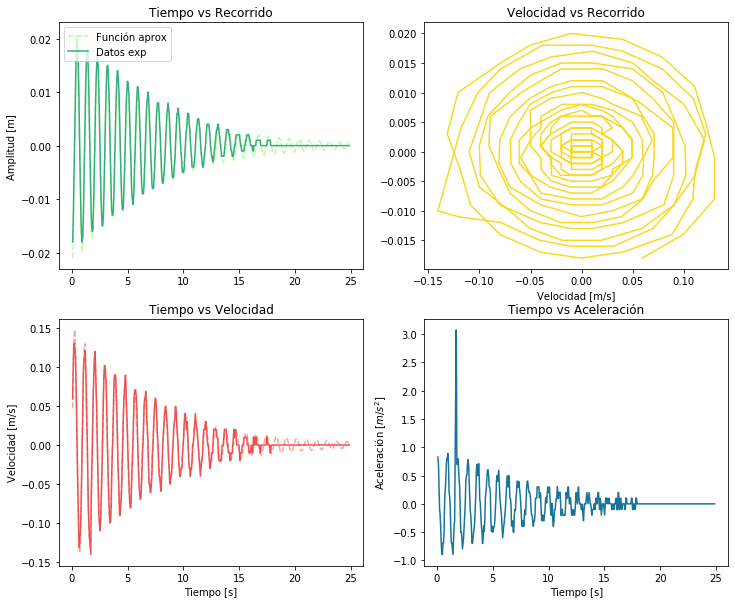

In [17]:
auto('datos laboratorio/2 cm 5 g.txt',m1,'prueba.png')

(0.022, 0.142, 6.949, -1.81, 0.022, 0.141, 6.953, -1.831, 0.262, 0.904, 0.904)

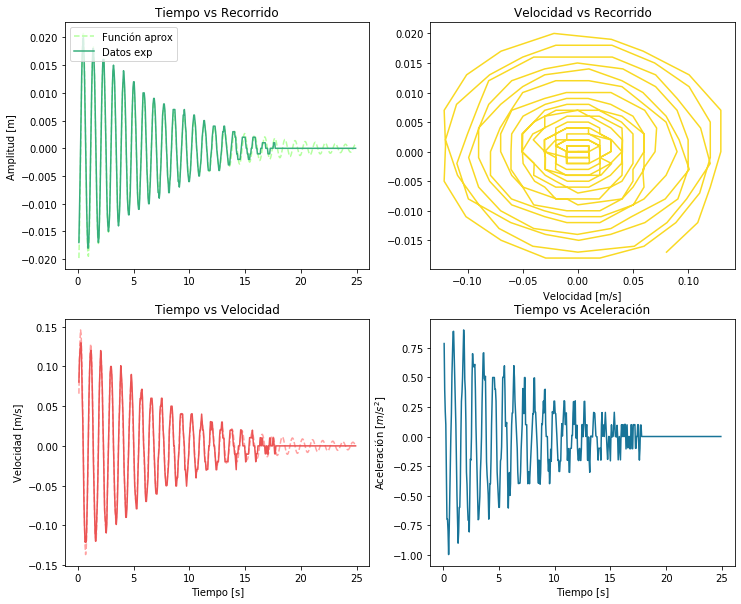

In [18]:
auto('datos laboratorio/bien 2 cm 5 g.txt',m1,'Fig_2cm_5g.png')

(0.043, 0.08, 6.912, -1.72, 0.042, 0.08, 6.913, -1.73, 0.262, 0.909, 0.909)

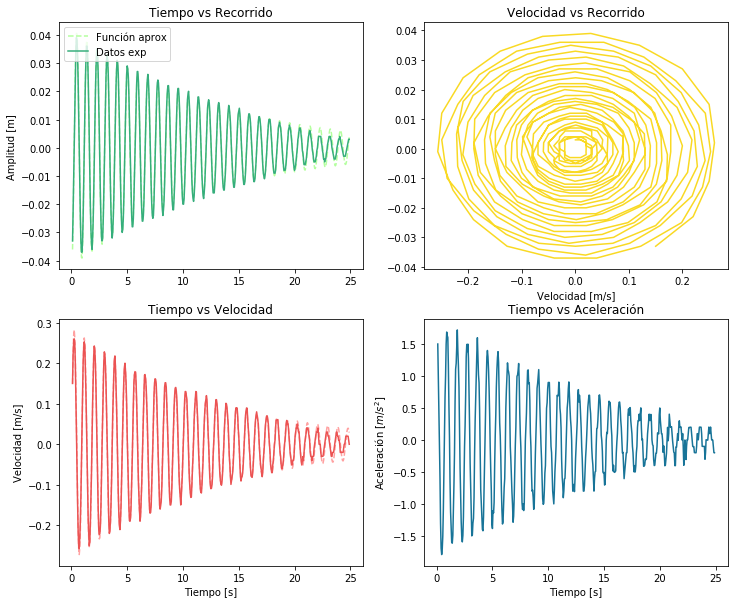

In [19]:
auto('datos laboratorio/4 cm 5 g.txt',m1,'Fig_4cm_5g.png')

(0.064, 0.06, 6.901, -1.685, 0.062, 0.06, 6.901, -1.69, 0.262, 0.91, 0.91)

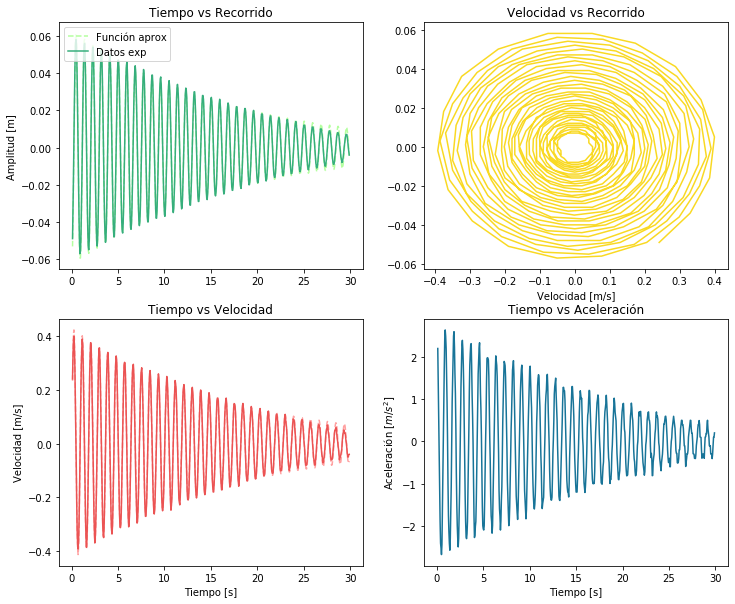

In [20]:
auto('datos laboratorio/6 cm 5 g.txt',m1,'Fig_6cm_5g.png')

C:\Users\USUARIO\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.262, 6.283, 6.283)

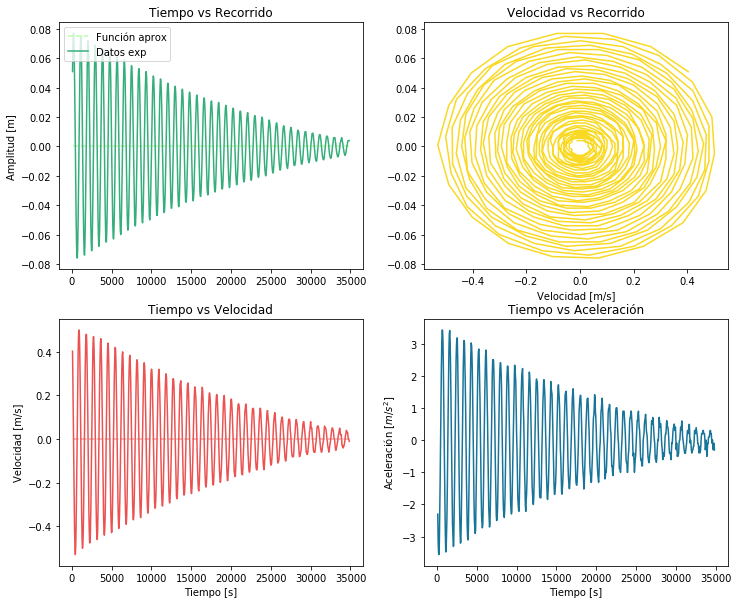

In [21]:
auto('datos laboratorio/8 cm 5 g.txt',m1,'Fig_8cm_5g.png')

### Caso 2: 10 g aprox

(-0.021, 0.142, 6.698, -9.446, 0.02, 0.142, 6.698, -0.022, 0.362, 0.938, 0.938)

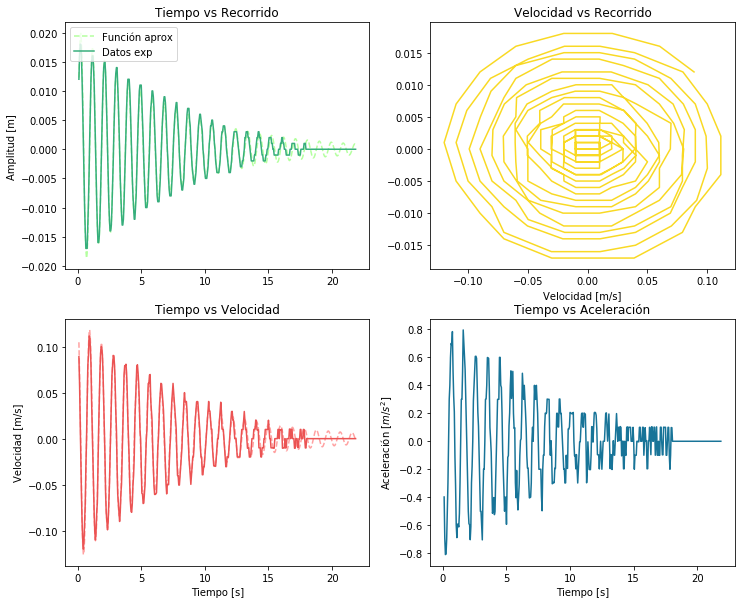

In [22]:
auto('datos laboratorio/2 cm 10 g.txt',m2,'Fig_2cm_10g.png')

(-0.044,
 0.098,
 6.667,
 -3.159,
 0.043,
 0.098,
 6.667,
 -0.018,
 0.362,
 0.942,
 0.942)

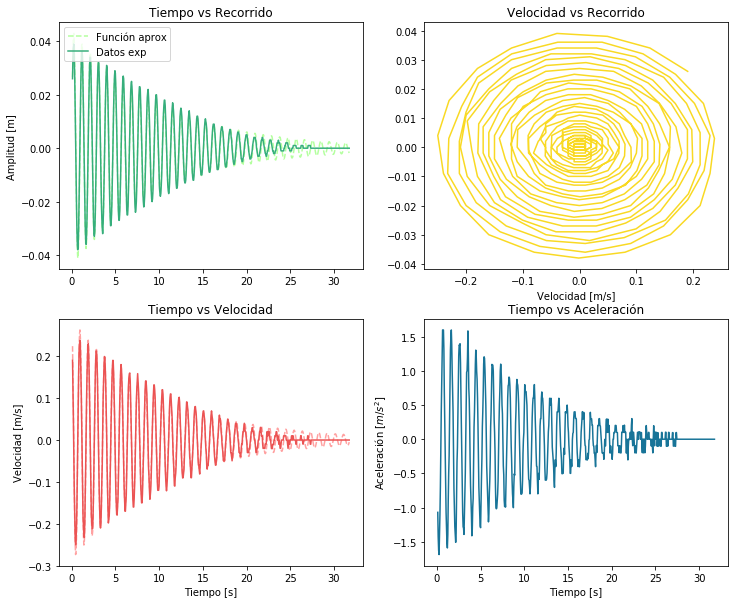

In [23]:
auto('datos laboratorio/4 cm 10 g.txt',m2,'Fig_4cm_10g.png')

(-0.063, 0.065, 6.662, -9.413, 0.062, 0.065, 6.662, 0.012, 0.362, 0.943, 0.943)

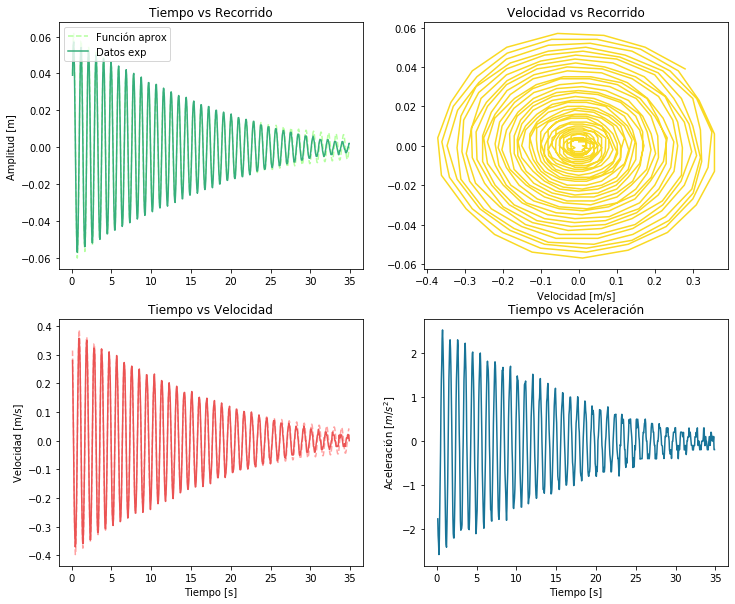

In [24]:
auto('datos laboratorio/6 cm 10 g.txt',m2,'Fig_6cm_10g.png')

(0.086, 0.062, 6.65, -6.275, 0.085, 0.062, 6.65, 0.007, 0.362, 0.945, 0.945)

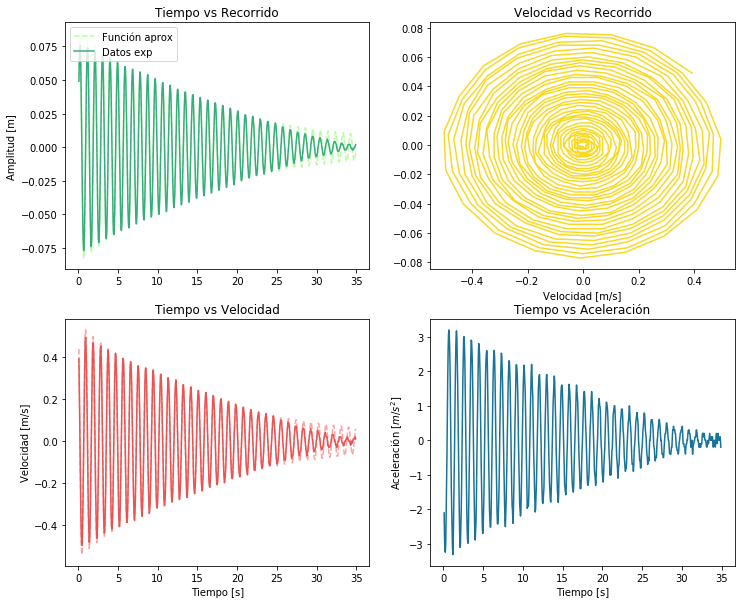

In [25]:
auto('datos laboratorio/8 cm 10 g.txt',m2,'Fig_8cm_10g.png')

### Caso 3: 20 g aprox

(-0.021, 0.127, 6.234, -3.107, 0.02, 0.128, 6.234, 0.034, 0.516, 1.008, 1.008)

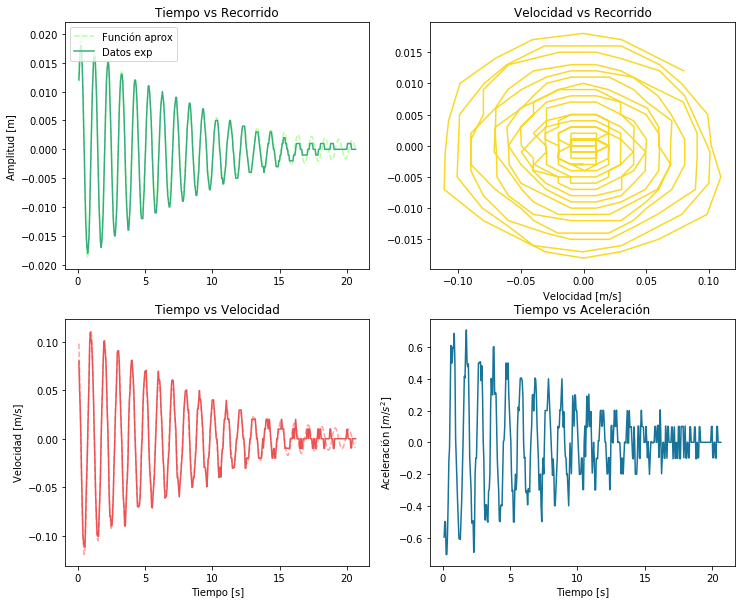

In [26]:
auto('datos laboratorio/2 cm 20 g.txt',m3,'Fig_2cm_20g.png')

(-0.041, 0.082, 6.219, -9.419, 0.041, 0.082, 6.219, 0.005, 0.516, 1.01, 1.01)

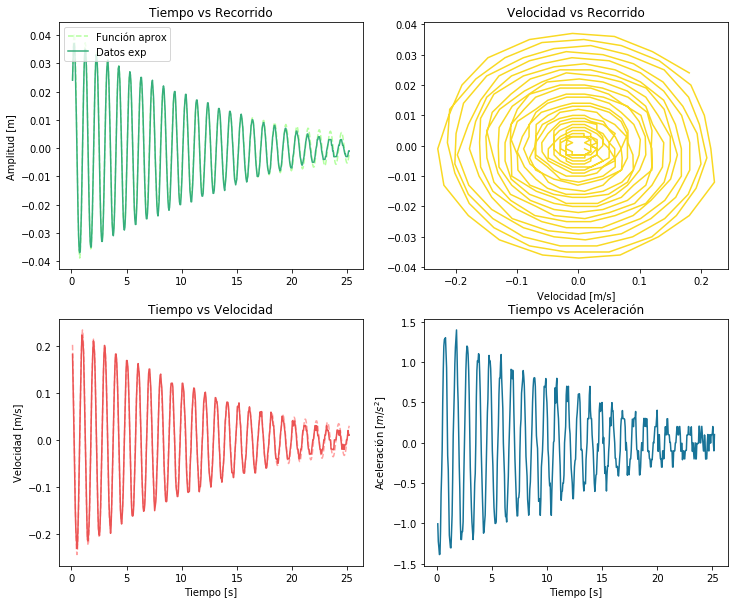

In [27]:
auto('datos laboratorio/4 cm 20 g.txt',m3,'Fig_4cm_20g.png')

(-0.069, 0.09, 6.208, -9.454, 0.068, 0.09, 6.209, -0.032, 0.516, 1.012, 1.012)

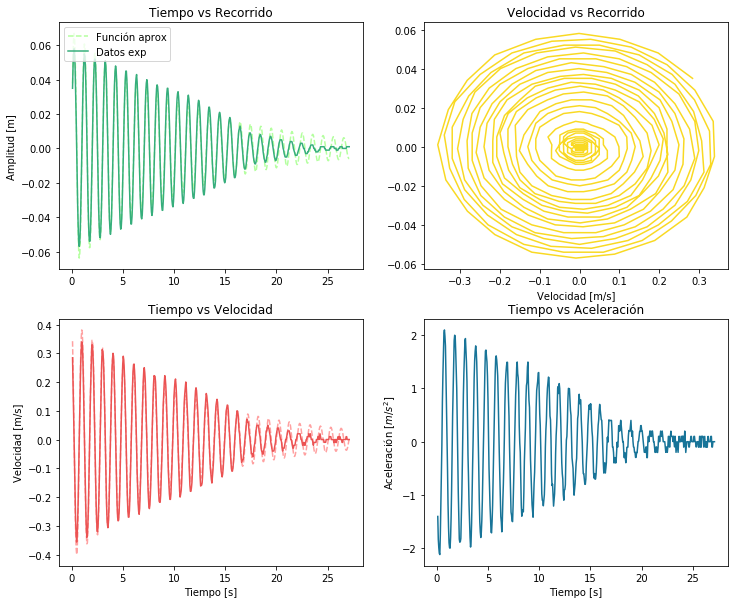

In [28]:
auto('datos laboratorio/6 cm 20 g.txt',m3,'Fig_6cm_20g.png')

(0.083, 0.05, 6.201, -6.273, 0.082, 0.05, 6.201, 0.01, 0.516, 1.013, 1.013)

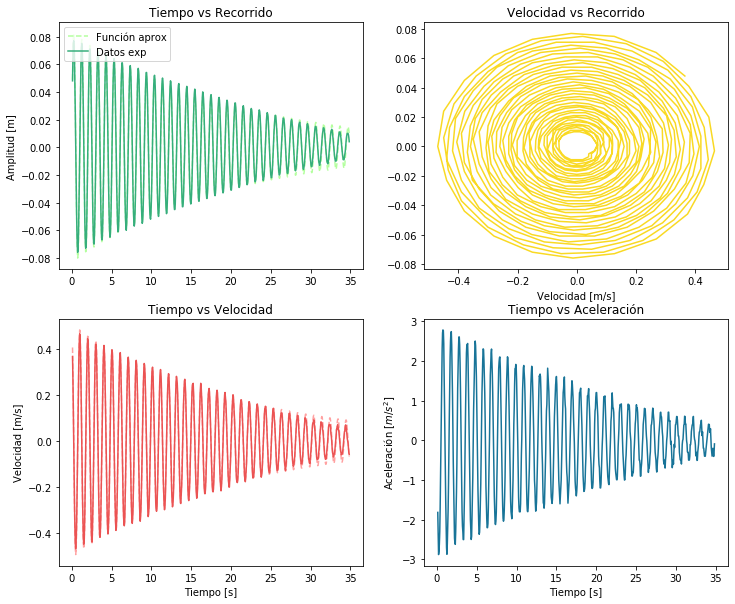

In [29]:
auto('datos laboratorio/8 cm 20 g primera.txt',m3,'Fig_8cm_20g_primera.png')

(0.085, 0.052, 6.201, -6.298, 0.084, 0.052, 6.202, -0.016, 0.516, 1.013, 1.013)

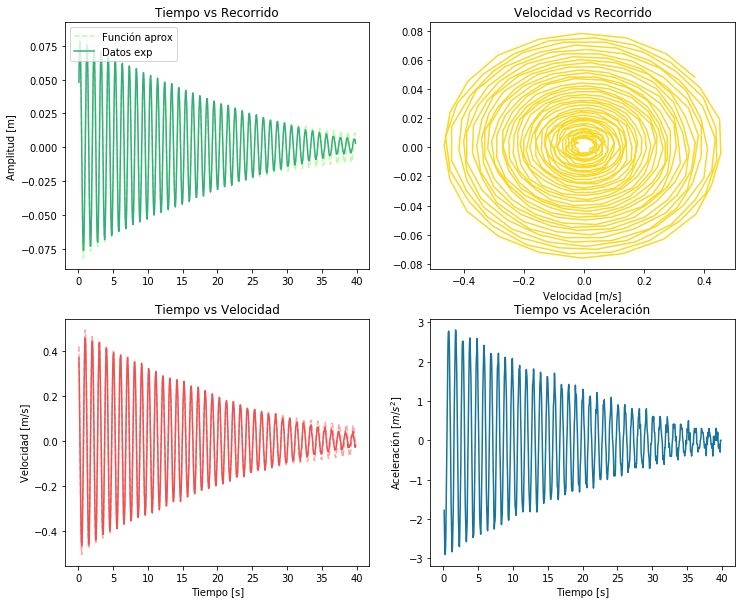

In [30]:
auto('datos laboratorio/8 cm 20 g segunda.txt',m3,'Fig_8cm_20g_segunda.png')

## Realizar gráfica m vs T^2

In [34]:
masa = np.array([m1,m2,m3])
periodo =np.array([(0.262)**2, (0.362)**2, (0.516)**2])

In [42]:
def cte(x, a, b):
    return 4*(pi**2)*(1/a)*x + b

paramcte, cov = curve_fit(cte, masa/1000, periodo)

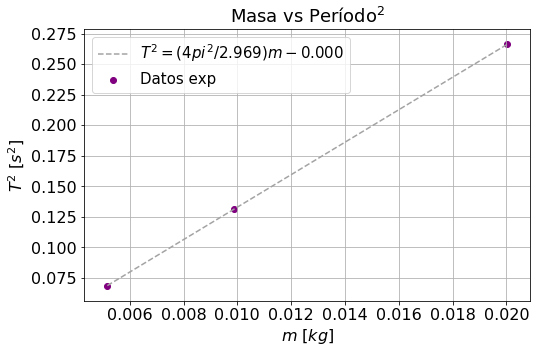

In [49]:
#Creamos una figura de tamaño 8x5
plt.figure(figsize=(8, 5)) 

#Graficamos la función de ajustr
plt.plot(masa/1000, cte(masa/1000, *paramcte), color ='#a3a3a3', linestyle='--', label='$T^2 = (4pi^2/ %.3f)m %.3f$'%(paramcte[0],paramcte[1]))
plt.scatter(masa/1000, periodo, color='#800080', label='Datos exp')
plt.legend() #mostrar leyendes de los datos y ajuste
#Al multiplicar la masa por  9.81 nos da como resultadoel peso en Newtons

#---------------------------------------------------
##Definimos titulos, tamaño de fuente y de etiquetas
#---------------------------------------------------

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Masa vs Período$^2$', fontsize = 18)
plt.legend(fontsize = 15, loc='upper left')

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$T^2$ [$s^2$]', fontsize = 16)
plt.xlabel('$m$ [$kg$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 16)
plt.yticks(size = 16)

plt.grid(True) #mostramos la rejilla de fondo
plt.show() #mostramos todo lo que

# Cosas que me pueden servir
Al parecer ya no me sirvieron pero las voy a dejar ahí por si acaso

## Parte 1

In [ ]:
#Creamos una figura de tamaño 8x5
plt.figure(figsize=(8, 5)) 

#Graficamos la función de ajustr
plt.plot(x/9.81, func(x/9.81, *param2), color ='blue', linestyle='--', label='$m = %.3fx/g + %.3f$'%(param2[0],param2[1]))
plt.scatter(x/9.81, (m/1000), color='red')
plt.legend() #mostrar leyendes de los datos y ajuste


#---------------------------------------------------
##Definimos titulos, tamaño de fuente y de etiquetas
#---------------------------------------------------

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Elogación/gravedad vs Masa', fontsize = 18)
plt.legend(fontsize = 15, loc='upper left')

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$x/g$ [$s^2$]', fontsize = 16)
plt.xlabel('$m$ [$kg$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 16)
plt.yticks(size = 16)

plt.grid(True) #mostramos la rejilla de fondo
plt.show() #mostramos todo lo que graficamos

## Parte 2

In [ ]:
t
y=dat25['Recorrido s_A1 / m']
type(y)
y

In [ ]:
#Creamos una figura de tamaño 8x5
plt.figure(figsize=(8, 5)) 

#Graficamos la función de ajustr
plt.plot(v, r, color ='blue', linestyle='-')

#---------------------------------------------------
##Definimos titulos, tamaño de fuente y de etiquetas
#---------------------------------------------------

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Elogación/gravedad vs Masa', fontsize = 18)


#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.ylabel('$x/g$ [$s^2$]', fontsize = 16)
plt.xlabel('$m$ [$kg$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 16)
plt.yticks(size = 16)

plt.grid(True) #mostramos la rejilla de fondo
plt.show() #mostramos todo lo que graficamos

In [ ]:
lista = []
p = pd.Index(r).get_loc(0)
newindex=-1

for n in p:
    newindex = newindex + 1
    if n == True:
        lista.append(newindex)
    

In [ ]:
array = np.arange(0,len(lista)+1)
ayx= y[lista[0]:lista[2*0+1]+1]

In [ ]:
len(lista)
vrg = y[lista[0]:lista[1]+1]
vrg.max()
#for i in array:
    #h = y[lista[2*i]:lista[(2*i)+1]]

In [ ]:
myseries = pd.Series([1,4,0,7.3,0], index=[0,1,2,3,4])
myseries  

In [ ]:
efe = pd.Index(myseries).get_loc(0)
efe

In [ ]:
newindex=-1
newlist=[]
for n in efe:
    newindex = newindex + 1
    if n == True:
        newlist.append(newindex)
print(newlist)    